In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfs = pd.read_csv("C:/Users/kimbj/workplace/datas/AI-class-main/titanic.csv", index_col = 0)
df = pd.DataFrame(data=dfs)

In [4]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
X = df.drop(['Name','Ticket','Fare', 'Cabin', 'Embarked'], axis=1)

In [6]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0
...,...,...,...,...,...,...
887,0,2,male,27.0,0,0
888,1,1,female,19.0,0,0
889,0,3,female,NaN,1,2


In [7]:
X.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [8]:
totall_data=X.dropna(how='any')

Text(0.5, 1.0, 'Pclass')

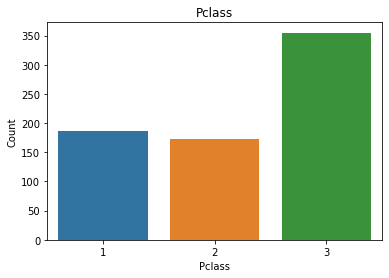

In [9]:
sns.countplot(data=totall_data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass")

Text(0.5, 1.0, 'Survived')

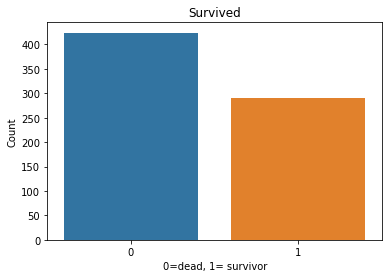

In [10]:
sns.countplot(data=totall_data, x="Survived")
plt.xlabel("0=dead, 1= survivor")
plt.ylabel("Count")
plt.title("Survived")

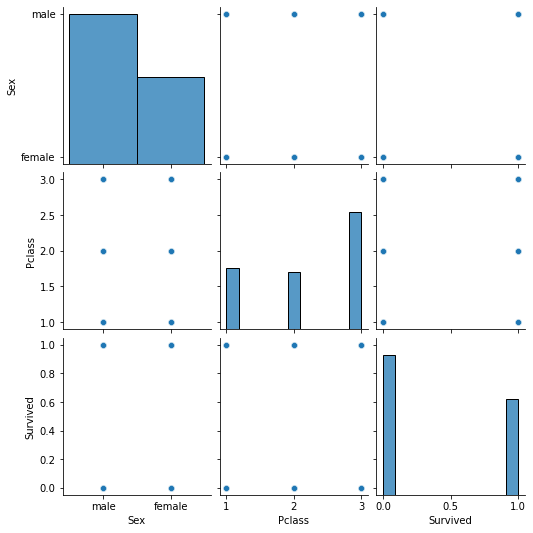

In [12]:
sns.pairplot(totall_data, vars=["Sex","Pclass","Survived"])
plt.show()

In [21]:
df_data=totall_data.drop(["Survived", "Sex"], axis=1)
df_target=totall_data.Survived

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,test_size=0.25,random_state=0)
amodel = KNeighborsClassifier(n_neighbors=3)
amodel.fit(X_train, y_train)
prediction = amodel.predict(X_test)
accuracy = amodel.score(X_test, y_test)
print(accuracy)

0.6201117318435754


In [24]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.5977653631284916
[[98  5]
 [67  9]]


In [25]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.659217877094972
[[81 22]
 [39 37]]


In [26]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.659217877094972
[[79 24]
 [37 39]]


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.659217877094972
[[78 25]
 [36 40]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.664804469273743
[[74 29]
 [31 45]]
